In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report



In [2]:
fear_greed_df = pd.read_csv('/content/fear_greed_index.csv')
historical_df = pd.read_csv('/content/historical_data.csv')

#fear_greed_index.csv




Convert the 'timestamp' column to datetime objects and extract the date.



In [3]:
fear_greed_df['timestamp'] = pd.to_datetime(fear_greed_df['timestamp'], unit='s')
fear_greed_df['date'] = fear_greed_df['timestamp'].dt.date

#historical_data.csv




historical_df to identify the date column and then convert it to datetime objects.



In [4]:
print(historical_df.info())
print(historical_df.head())

historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
historical_df['date'] = historical_df['Timestamp IST'].dt.date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
historical_df['Timestamp'] = pd.to_datetime(historical_df['Timestamp'], unit='ms')

# Merge data

Merging the two DataFrames, `fear_greed_df` and `historical_df`, based on the extracted dates.


In [6]:
merged_df = pd.merge(historical_df, fear_greed_df, left_on='date', right_on='date', how='inner')
display(merged_df.head())
display(merged_df.info())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211218 non-null  object        
 1   Coin              211218 non-null  object        
 2   Execution Price   211218 non-null  float64       
 3   Size Tokens       211218 non-null  float64       
 4   Size USD          211218 non-null  float64       
 5   Side              211218 non-null  object        
 6   Timestamp IST     211218 non-null  datetime64[ns]
 7   Start Position    211218 non-null  float64       
 8   Direction         211218 non-null  object        
 9   Closed PnL        211218 non-null  float64       
 10  Transaction Hash  211218 non-null  object        
 11  Order ID          211218 non-null  int64         
 12  Crossed           211218 non-null  bool          
 13  Fee               211218 non-null  float64       
 14  Trad

None

## Classify data


Classifying the merged data based on relevant columns.


In [7]:
display(merged_df['classification'].value_counts())

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


# Handle missing values

Remove rows with missing values from the merged DataFrame after merging and classification.


In [8]:
merged_df = merged_df.dropna()
display(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211218 entries, 0 to 211217
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211218 non-null  object        
 1   Coin              211218 non-null  object        
 2   Execution Price   211218 non-null  float64       
 3   Size Tokens       211218 non-null  float64       
 4   Size USD          211218 non-null  float64       
 5   Side              211218 non-null  object        
 6   Timestamp IST     211218 non-null  datetime64[ns]
 7   Start Position    211218 non-null  float64       
 8   Direction         211218 non-null  object        
 9   Closed PnL        211218 non-null  float64       
 10  Transaction Hash  211218 non-null  object        
 11  Order ID          211218 non-null  int64         
 12  Crossed           211218 non-null  bool          
 13  Fee               211218 non-null  float64       
 14  Trad

None

# Output classification

Displaying the resulting classification without any missing values.


In [9]:
display(merged_df.head())
display(merged_df['classification'].value_counts())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,2024-12-02,2024-12-02 05:30:00,80,Extreme Greed


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [10]:
print("Date range of fear_greed_df:", fear_greed_df['date'].min(), "to", fear_greed_df['date'].max())
print("Date range of historical_df:", historical_df['Timestamp'].min(), "to", historical_df['Timestamp'].max())

Date range of fear_greed_df: 2018-02-01 to 2025-05-02
Date range of historical_df: 2023-03-28 10:40:00 to 2025-06-15 15:06:40


# Group data by classification

Group the `merged_df` by the 'classification' column.


In [11]:
grouped_classification = merged_df.groupby('classification')

### Calculating the sum, mean, and median of 'Closed PnL' and 'Size USD' for each classification group and store the result in a new DataFrame.



In [12]:
aggregated_metrics = grouped_classification[['Closed PnL', 'Size USD']].agg(['sum', 'mean', 'median'])
display(aggregated_metrics)

Closed PnL                        Size USD               \
                         sum       mean median           sum         mean   
classification                                                              
Extreme Fear    7.391102e+05  34.537862    0.0  1.144843e+08  5349.731843   
Extreme Greed   2.715171e+06  67.892861    0.0  1.244652e+08  3112.251565   
Fear            3.357155e+06  54.290400    0.0  4.833248e+08  7816.109931   
Greed           2.150129e+06  42.743559    0.0  2.885825e+08  5736.884375   
Neutral         1.292921e+06  34.307718    0.0  1.802421e+08  4782.732661   

                         
                 median  
classification           
Extreme Fear    766.150  
Extreme Greed   500.050  
Fear            735.960  
Greed           555.000  
Neutral         547.655

In [13]:
merged_df.to_csv('merged_trader_sentiment.csv', index=False)

### Saved the aggregated data to a new CSV file named 'aggregated_metrics.csv'.


In [14]:
aggregated_metrics.to_csv('aggregated_metrics.csv')

### Calculating overall mean, median, and sum of 'Size USD' and 'Closed PnL' from merged_df


In [15]:
if 'merged_df' in locals():
    if 'Size USD' in merged_df.columns:
        overall_size_usd_mean = merged_df['Size USD'].mean()
        overall_size_usd_median = merged_df['Size USD'].median()
        overall_size_usd_sum = merged_df['Size USD'].sum()
        print(f"Overall Mean of Size USD: {overall_size_usd_mean:.2f}")
        print(f"Overall Median of Size USD: {overall_size_usd_median:.2f}")
        print(f"Overall Sum of Size USD: {overall_size_usd_sum:.2f}")
    else:
        print("'Size USD' column not available in merged dataframe.")

    if 'Closed PnL' in merged_df.columns:
        overall_closed_pnl_mean = merged_df['Closed PnL'].mean()
        overall_closed_pnl_median = merged_df['Closed PnL'].median()
        overall_closed_pnl_sum = merged_df['Closed PnL'].sum()
        print(f"Overall Mean of Closed PnL: {overall_closed_pnl_mean:.2f}")
        print(f"Overall Median of Closed PnL: {overall_closed_pnl_median:.2f}")
        print(f"Overall Sum of Closed PnL: {overall_closed_pnl_sum:.2f}")
    else:
        print("'Closed PnL' column not available in merged dataframe.")
else:
    print("Merged dataframe not available.")

Overall Mean of Size USD: 5639.19
Overall Median of Size USD: 597.02
Overall Sum of Size USD: 1191098773.60
Overall Mean of Closed PnL: 48.55
Overall Median of Closed PnL: 0.00
Overall Sum of Closed PnL: 10254486.95


In [16]:
output_dir = 'output_plots'
os.makedirs(output_dir, exist_ok=True)

### Trader Profitability by Market Sentiment

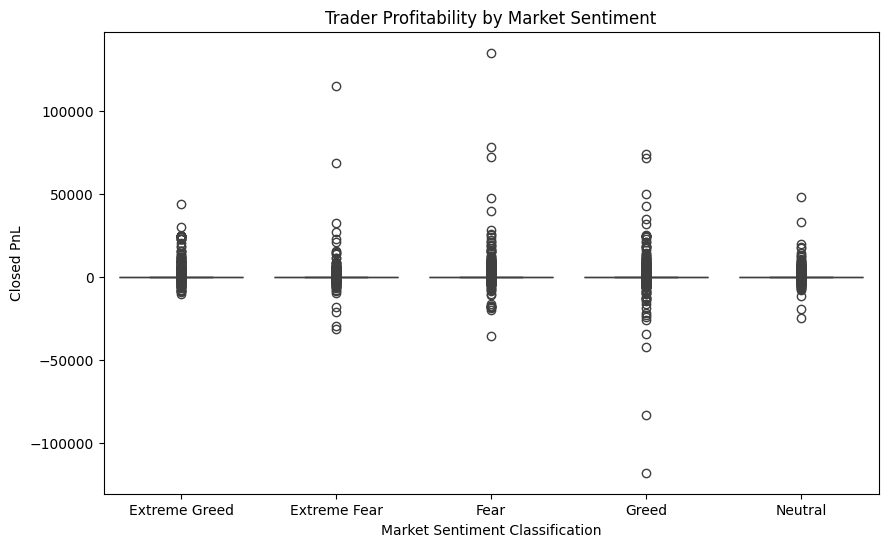

In [17]:
merged_df_cleaned = merged_df.dropna(subset=['classification', 'Closed PnL']).copy()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df_cleaned, x='classification', y='Closed PnL')
plt.title("Trader Profitability by Market Sentiment")
plt.xlabel("Market Sentiment Classification")
plt.ylabel("Closed PnL")
plt.savefig(os.path.join(output_dir, 'trader_profitability_boxplot.png'))

### Distribution of Closed PnL by Market Sentiment

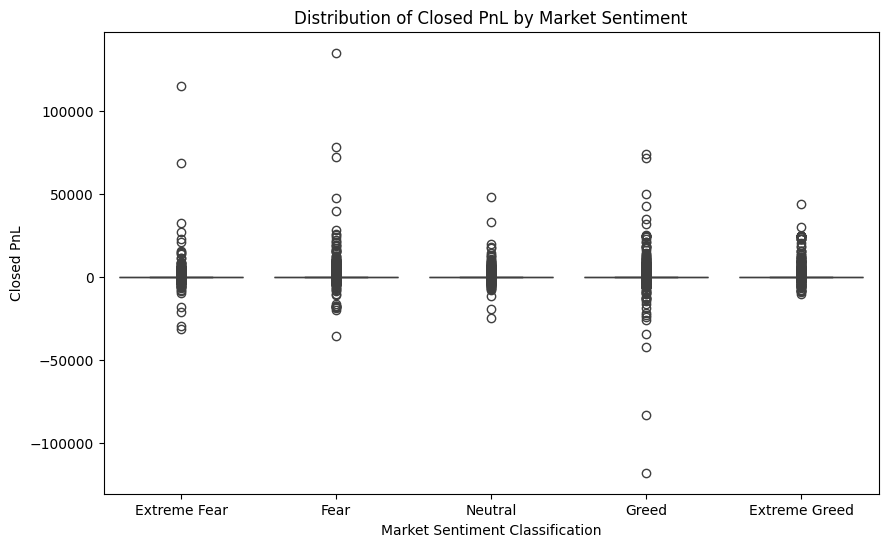

In [18]:


plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title("Distribution of Closed PnL by Market Sentiment")
plt.xlabel("Market Sentiment Classification")
plt.ylabel("Closed PnL")
plt.savefig(os.path.join(output_dir, 'distribution_of_closed_PnL_Market.png'))
plt.show()





### Distribution of Size USD by Market Sentiment (as a proxy for Risk)

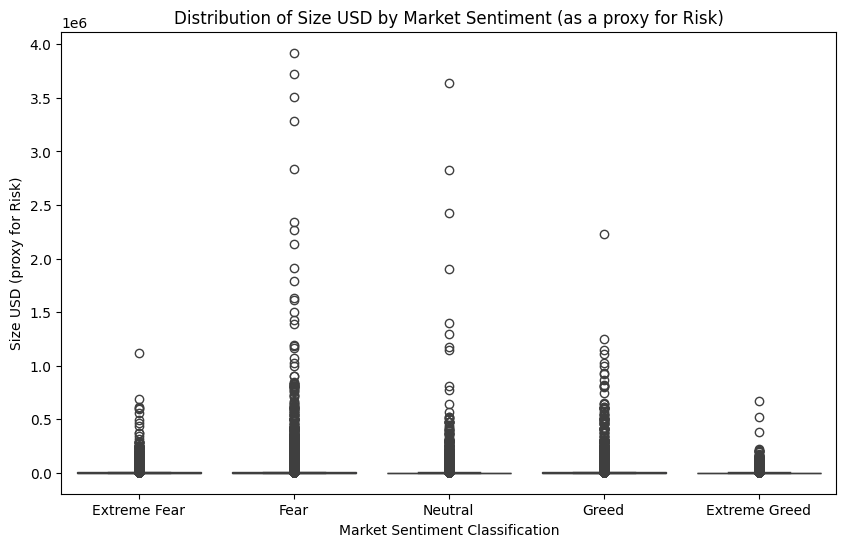

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='classification', y='Size USD', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title("Distribution of Size USD by Market Sentiment (as a proxy for Risk)")
plt.xlabel("Market Sentiment Classification")
plt.ylabel("Size USD (proxy for Risk)")
plt.savefig(os.path.join(output_dir, 'distribution_closed__Market_proxy_risk.png'))
plt.show()

### Distribution of Fear and Greed Index Values

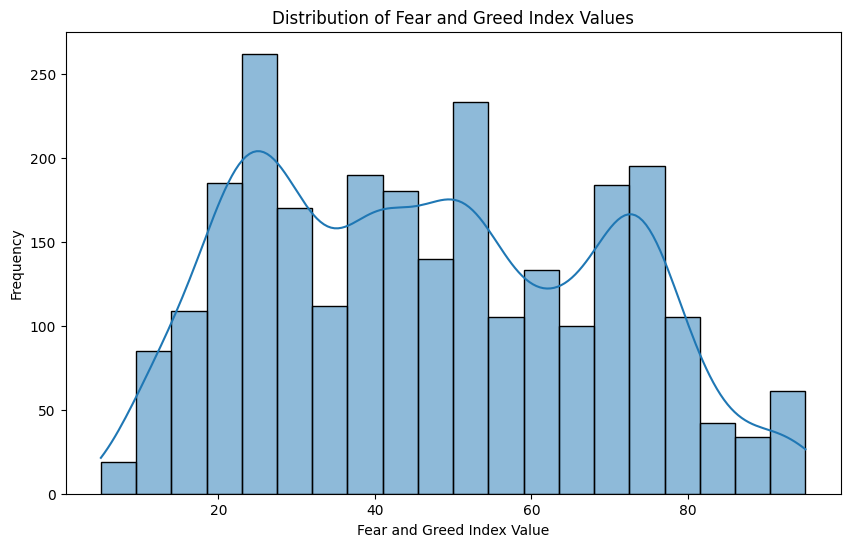

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fear_greed_df, x='value', bins=20, kde=True)
plt.title("Distribution of Fear and Greed Index Values")
plt.xlabel("Fear and Greed Index Value")
plt.ylabel("Frequency")
plt.savefig(os.path.join(output_dir, 'distribution_fear_greed_index.png'))
plt.show()


### Correlation Matrix of Trader Metrics

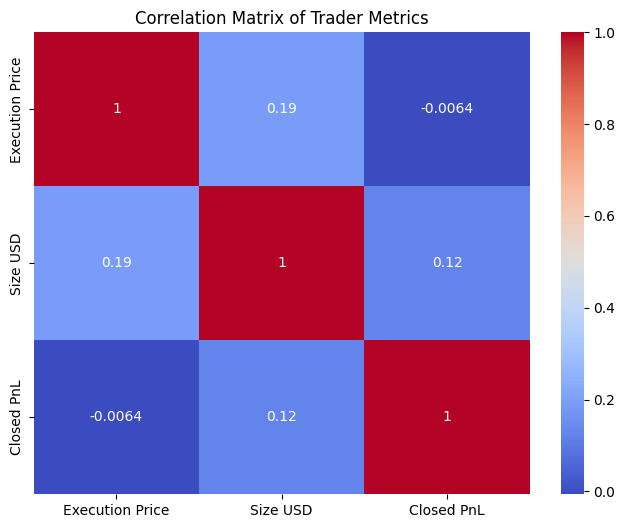

In [21]:

plt.figure(figsize=(8, 6))
corr_features = ['Execution Price', 'Size USD', 'Closed PnL']
corr_matrix = merged_df[corr_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Trader Metrics")
plt.savefig(os.path.join(output_dir, 'correlation_matrix_trader_metrics.png'))
plt.show()

### Average Daily Trader PnL Over Time

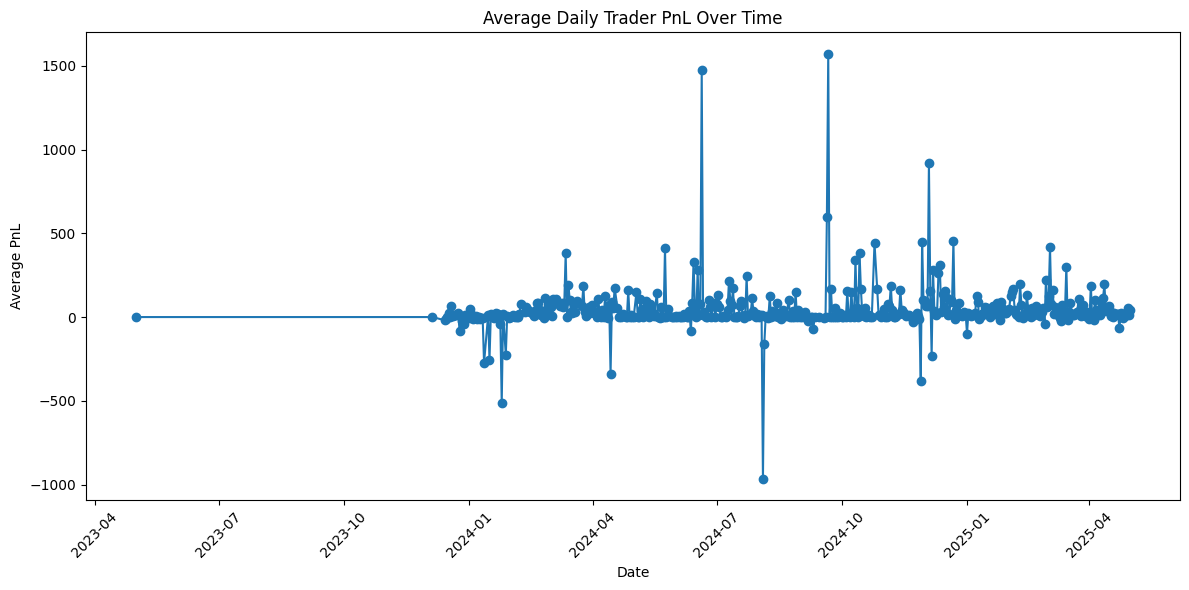

In [22]:

plt.figure(figsize=(12, 6))
daily_pnl = merged_df.groupby('date')['Closed PnL'].mean().reset_index()

plt.plot(daily_pnl['date'], daily_pnl['Closed PnL'], marker='o')
plt.title("Average Daily Trader PnL Over Time")
plt.xlabel("Date")
plt.ylabel("Average PnL")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'average_daily_pnl_over_time.png'))
plt.show()

### Market Sentiment Trend Over Time

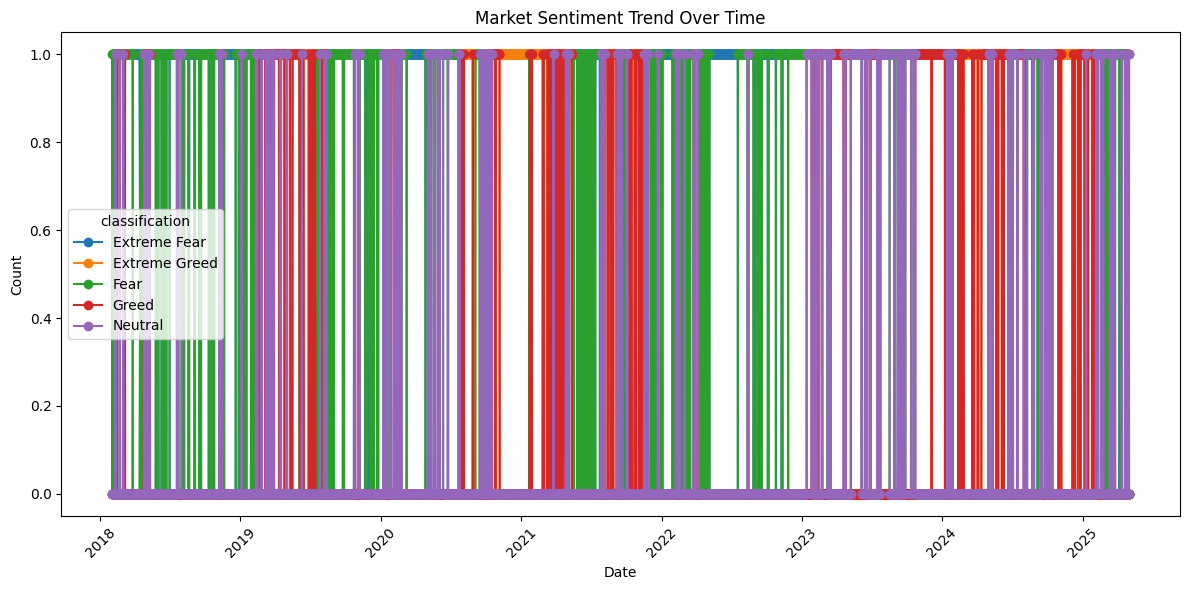

In [23]:
plt.figure(figsize=(12, 6))
sentiment_trend = fear_greed_df.groupby(['date', 'classification']).size().unstack(fill_value=0)

sentiment_trend.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Market Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'market_sentiment_trend_over_time.png'))
plt.show()

### Average PnL by Sentiment Over Time

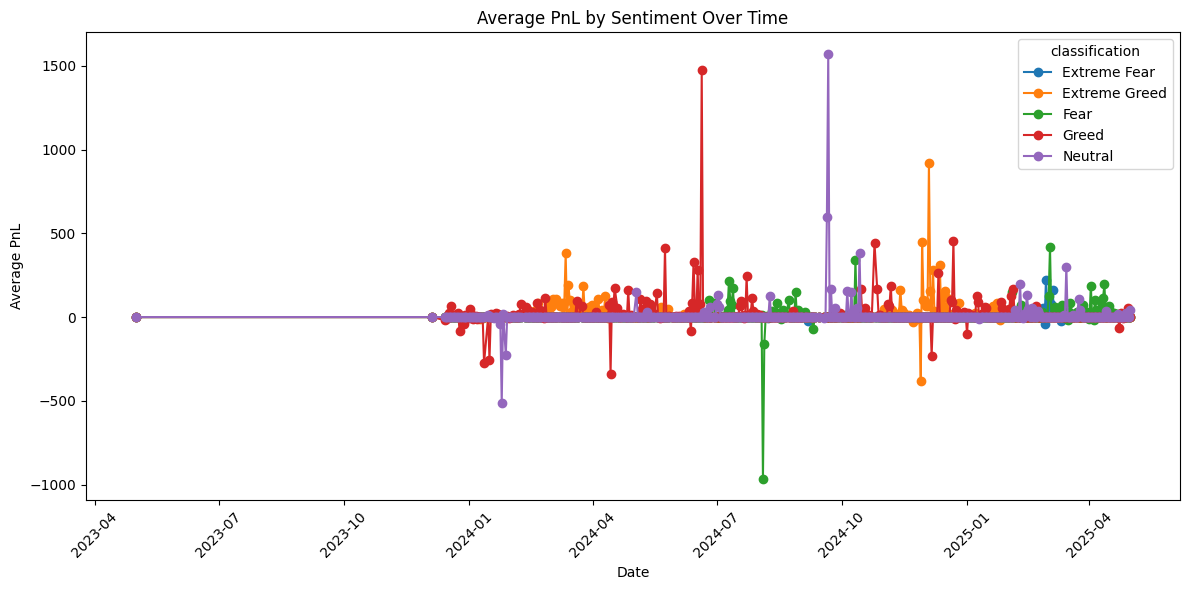

In [24]:
plt.figure(figsize=(12, 6))
sentiment_pnl = merged_df.groupby(['date', 'classification'])['Closed PnL'].mean().unstack()

sentiment_pnl = sentiment_pnl.fillna(0)

if not sentiment_pnl.empty and sentiment_pnl.select_dtypes(include=np.number).empty == False:
    sentiment_pnl.plot(kind='line', marker='o', ax=plt.gca())
    plt.title("Average PnL by Sentiment Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average PnL")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'average_pnl_by_sentiment_over_time.png'))
    plt.show()
else:
    print("sentiment_pnl is empty or contains no numeric data after processing. Cannot plot.")

###  Random Forest algorithm

In [25]:


merged_df['sentiment_encoded'] = merged_df['classification'].map({'positive': 1, 'neutral': 0, 'negative': -1})

merged_df_cleaned_model = merged_df.dropna(subset=['sentiment_encoded']).copy()

features = ['Execution Price', 'Size USD', 'Closed PnL']
features_present = [f for f in features if f in merged_df_cleaned_model.columns]
if len(features_present) != len(features):
    print(f"Warning: Some specified features are not in the dataframe: {list(set(features) - set(features_present))}")

X = merged_df_cleaned_model[features_present]
y = merged_df_cleaned_model['sentiment_encoded']

if X.empty or len(y) == 0:
    print("Error: No data remaining after dropping rows with missing sentiment for modeling.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(y_test)
    print("📈 Sentiment Prediction Report")
    print(classification_report(y_test, y_pred))

Error: No data remaining after dropping rows with missing sentiment for modeling.


### Checking for missing values in the 'classification' column of the merged dataframe


In [26]:
print("Number of rows with missing sentiment classification:", merged_df['classification'].isnull().sum())
print("Total number of rows in merged_df:", len(merged_df))

Number of rows with missing sentiment classification: 0
Total number of rows in merged_df: 211218


### Checking the date ranges of the original dataframes


In [27]:
print("Date range of historical_df:", historical_df['date'].min(), "to", historical_df['date'].max())
print("Date range of fear_greed_df:", fear_greed_df['date'].min(), "to", fear_greed_df['date'].max())

Date range of historical_df: 2023-05-01 to 2025-05-01
Date range of fear_greed_df: 2018-02-01 to 2025-05-02
